![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Decoupling: Sorting bins method
</b>
</span>

---
**Notebook version**: `2` (16 May 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Calculate daily correlation between two time series.


</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")
from diive.pkgs.analyses.decoupling import SortingBinsMethod
from diive.configs.exampledata import load_exampledata_parquet  # Example data

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


</br>

# **Load example data**

In [2]:
xvar = 'VPD_f'  # Vapor pressure deficit
zvar = 'Tair_f'  # Air temperature
yvar = 'Rg_f'  # Radiation used to detect daytime data

In [3]:
# Load 10-year dataset of half-hourly measurements
df = load_exampledata_parquet()

# Keep data between June and September
df = df.loc[(df.index.month >= 6) & (df.index.month <= 9)].copy()

# Keep daytime data (radiation > 20 W m-2) and data when air temperatures was > 5°C
daytime_locs = (df[yvar] > 20) & (df[zvar] > 0)
df = df[daytime_locs].copy()

# # Rename variables
# rename_dict = {
#     ta_col: 'air_temperature',
#     vpd_col: 'vapor_pressure_deficit',
#     swin_col: 'short-wave_incoming_radiation'
# }
# df = df.rename(columns=rename_dict, inplace=False)

# # Use new column names
# ta_col = 'air_temperature'
# vpd_col = 'vapor_pressure_deficit'
# swin_col = 'short-wave_incoming_radiation'

# Make subset
df = df[[xvar, yvar, zvar]].copy()

df

Loaded .parquet file F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.046 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,VPD_f,Rg_f,Tair_f
TIMESTAMP_MIDDLE,,,
2013-06-01 05:15:00,0.082,37.857,0.100
2013-06-01 06:45:00,0.062,108.790,0.233
2013-06-01 07:15:00,0.065,137.107,0.333
2013-06-01 07:45:00,0.000,172.567,0.400
2013-06-01 08:15:00,0.066,250.213,1.000
...,...,...,...
2022-09-30 15:45:00,0.006,117.456,3.033
2022-09-30 16:15:00,0.156,111.235,3.217
2022-09-30 16:45:00,0.146,77.094,3.170


</br>

# **Calculate bin medians**

In [4]:
sbm = SortingBinsMethod(df=df,
                        xvar=xvar,
                        yvar=yvar,
                        zvar=zvar,                                               
                        n_bins_z=5,
                        n_bins_x=10,
                        conversion=None,  # Can be 'z-score' or 'percentile'
                        agg='median')
sbm.calcbins()

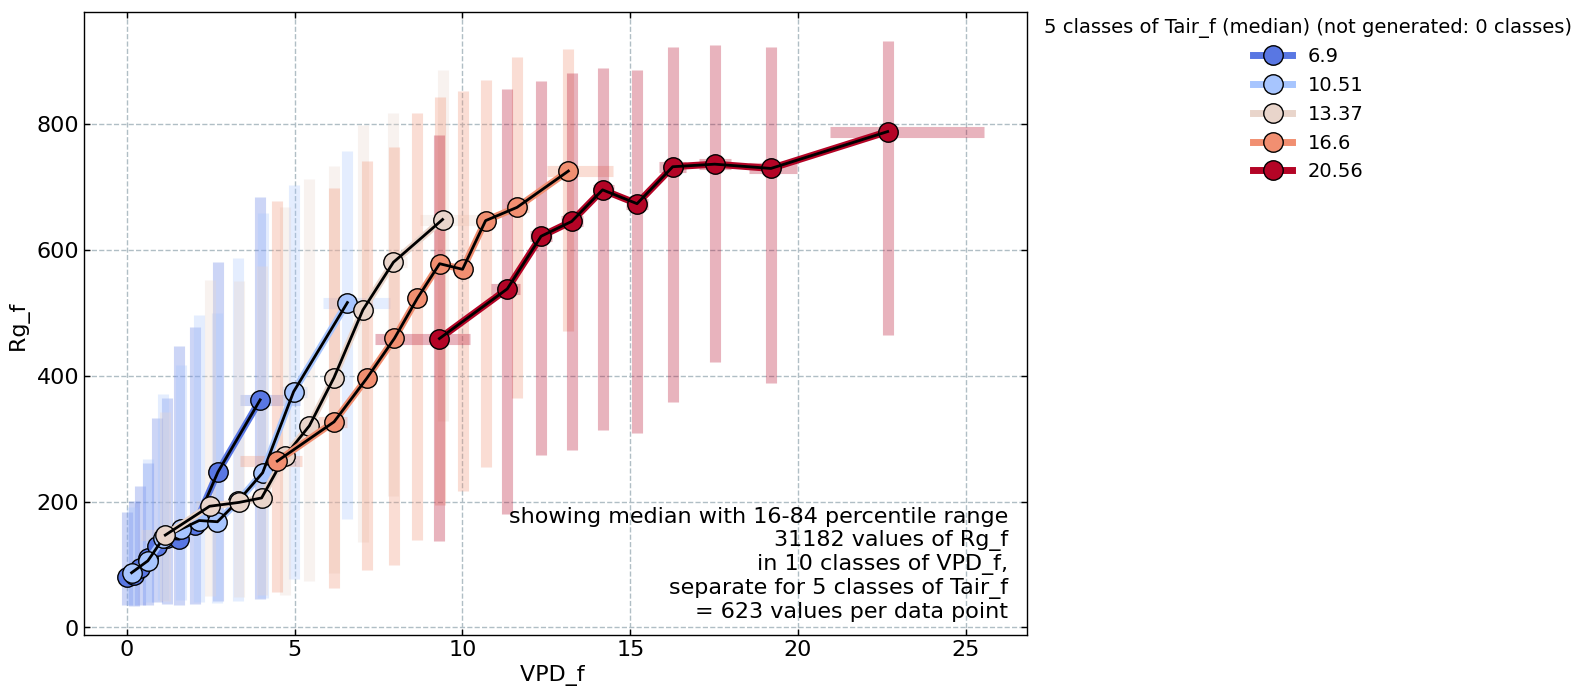

In [5]:
sbm.showplot_decoupling_sbm(marker='o', emphasize_lines=True)

Binning results (were also used to create the plot):

In [6]:
binmedians = sbm.get_binaggs()

In this example, the air temperature median is used as key in the results dictionary:

In [7]:
keys = []
for group_key, group_df in binmedians.items():
    keys.append(group_key)
print(keys, end=" ")

['6.9', '10.51', '13.37', '16.6', '20.56'] 

To access the results for the warmest class:

In [8]:
binmedians['20.56']

,group_VPD_f,VPD_f,Rg_f,Tair_f,Rg_f_COUNTS,VPD_f_P16,Rg_f_P16,VPD_f_P84,Rg_f_P84,xerror_neg,xerror_pos,yerror_neg,yerror_pos
0,"(3.4009999989999997, 10.52]",9.313,458.9930,18.9670,625,7.38728,136.63140,10.22348,782.66416,1.92572,0.91048,322.36160,323.67116
1,"(10.52, 11.8754]",11.334,537.9240,19.0765,622,10.84400,179.58104,11.71384,855.38456,0.49000,0.37984,358.34296,317.46056
2,"(11.8754, 12.7918]",12.342,621.5770,19.4330,623,12.01900,273.62124,12.65448,867.83700,0.32300,0.31248,347.95576,246.26000
3,"(12.7918, 13.7384]",13.255,645.1630,19.7670,623,12.93000,282.14596,13.58996,881.69172,0.32500,0.33496,363.01704,236.52872
4,"(13.7384, 14.678]",14.174,695.3225,20.3050,624,13.89136,313.35580,14.50864,888.77888,0.28264,0.33464,381.96670,193.45638
5,"(14.678, 15.6772]",15.202,673.3430,20.8000,623,14.87000,309.55340,15.54196,886.21988,0.33200,0.33996,363.78960,212.87688
6,"(15.6772, 16.837]",16.266,732.0570,21.2740,623,15.86908,358.52004,16.65100,922.61732,0.39692,0.38500,373.53696,190.56032
7,"(16.837, 18.2688]",17.516,736.1300,22.0000,623,17.04352,421.34944,18.01048,925.84008,0.47248,0.49448,314.78056,189.71008
8,"(18.2688, 20.461]",19.192,729.3590,22.9285,624,18.55072,387.94056,19.97264,922.26028,0.64128,0.78064,341.41844,192.90128
9,"(20.461, 32.118]",22.671,787.9510,24.7000,623,20.96404,464.69000,25.53740,932.40428,1.70696,2.86640,323.26100,144.45328


</br>

# **End of notebook**

In [9]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-05-16 23:05:30
